# **IBM HR Analytics Employee Attrition & Performance**

In [10]:
%cd /content/drive/MyDrive/ML/IBM_HR_Analytics

/content/drive/MyDrive/ML/IBM_HR_Analytics


##Libraries Used

In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,f1_score,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

##Importing Dataset

In [12]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.to_string())

      Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education    EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes      Travel_Rarely       1102                   Sales                 1          2     Life Sciences              1               1                        2  Female          94               3         2            Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1        

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Our Data has:
26 integer variables and 9 object variables

In [14]:
df['EmployeeCount'].unique()

array([1])

In [15]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [16]:
df['StandardHours'].unique()

array([80])

In [17]:
l =['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

##EDA

In [18]:
#Numerical Features
num_features = ['Age','DailyRate','DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
print("Numerical features: ",len(num_features))

#Categorical Featues
categorical_features = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked', 'Over18', 'OverTime', 'TrainingTimesLastYear','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
print("Catergorical features: ",len(categorical_features))

Numerical features:  14
Catergorical features:  20


###Analysis of Numerical Features

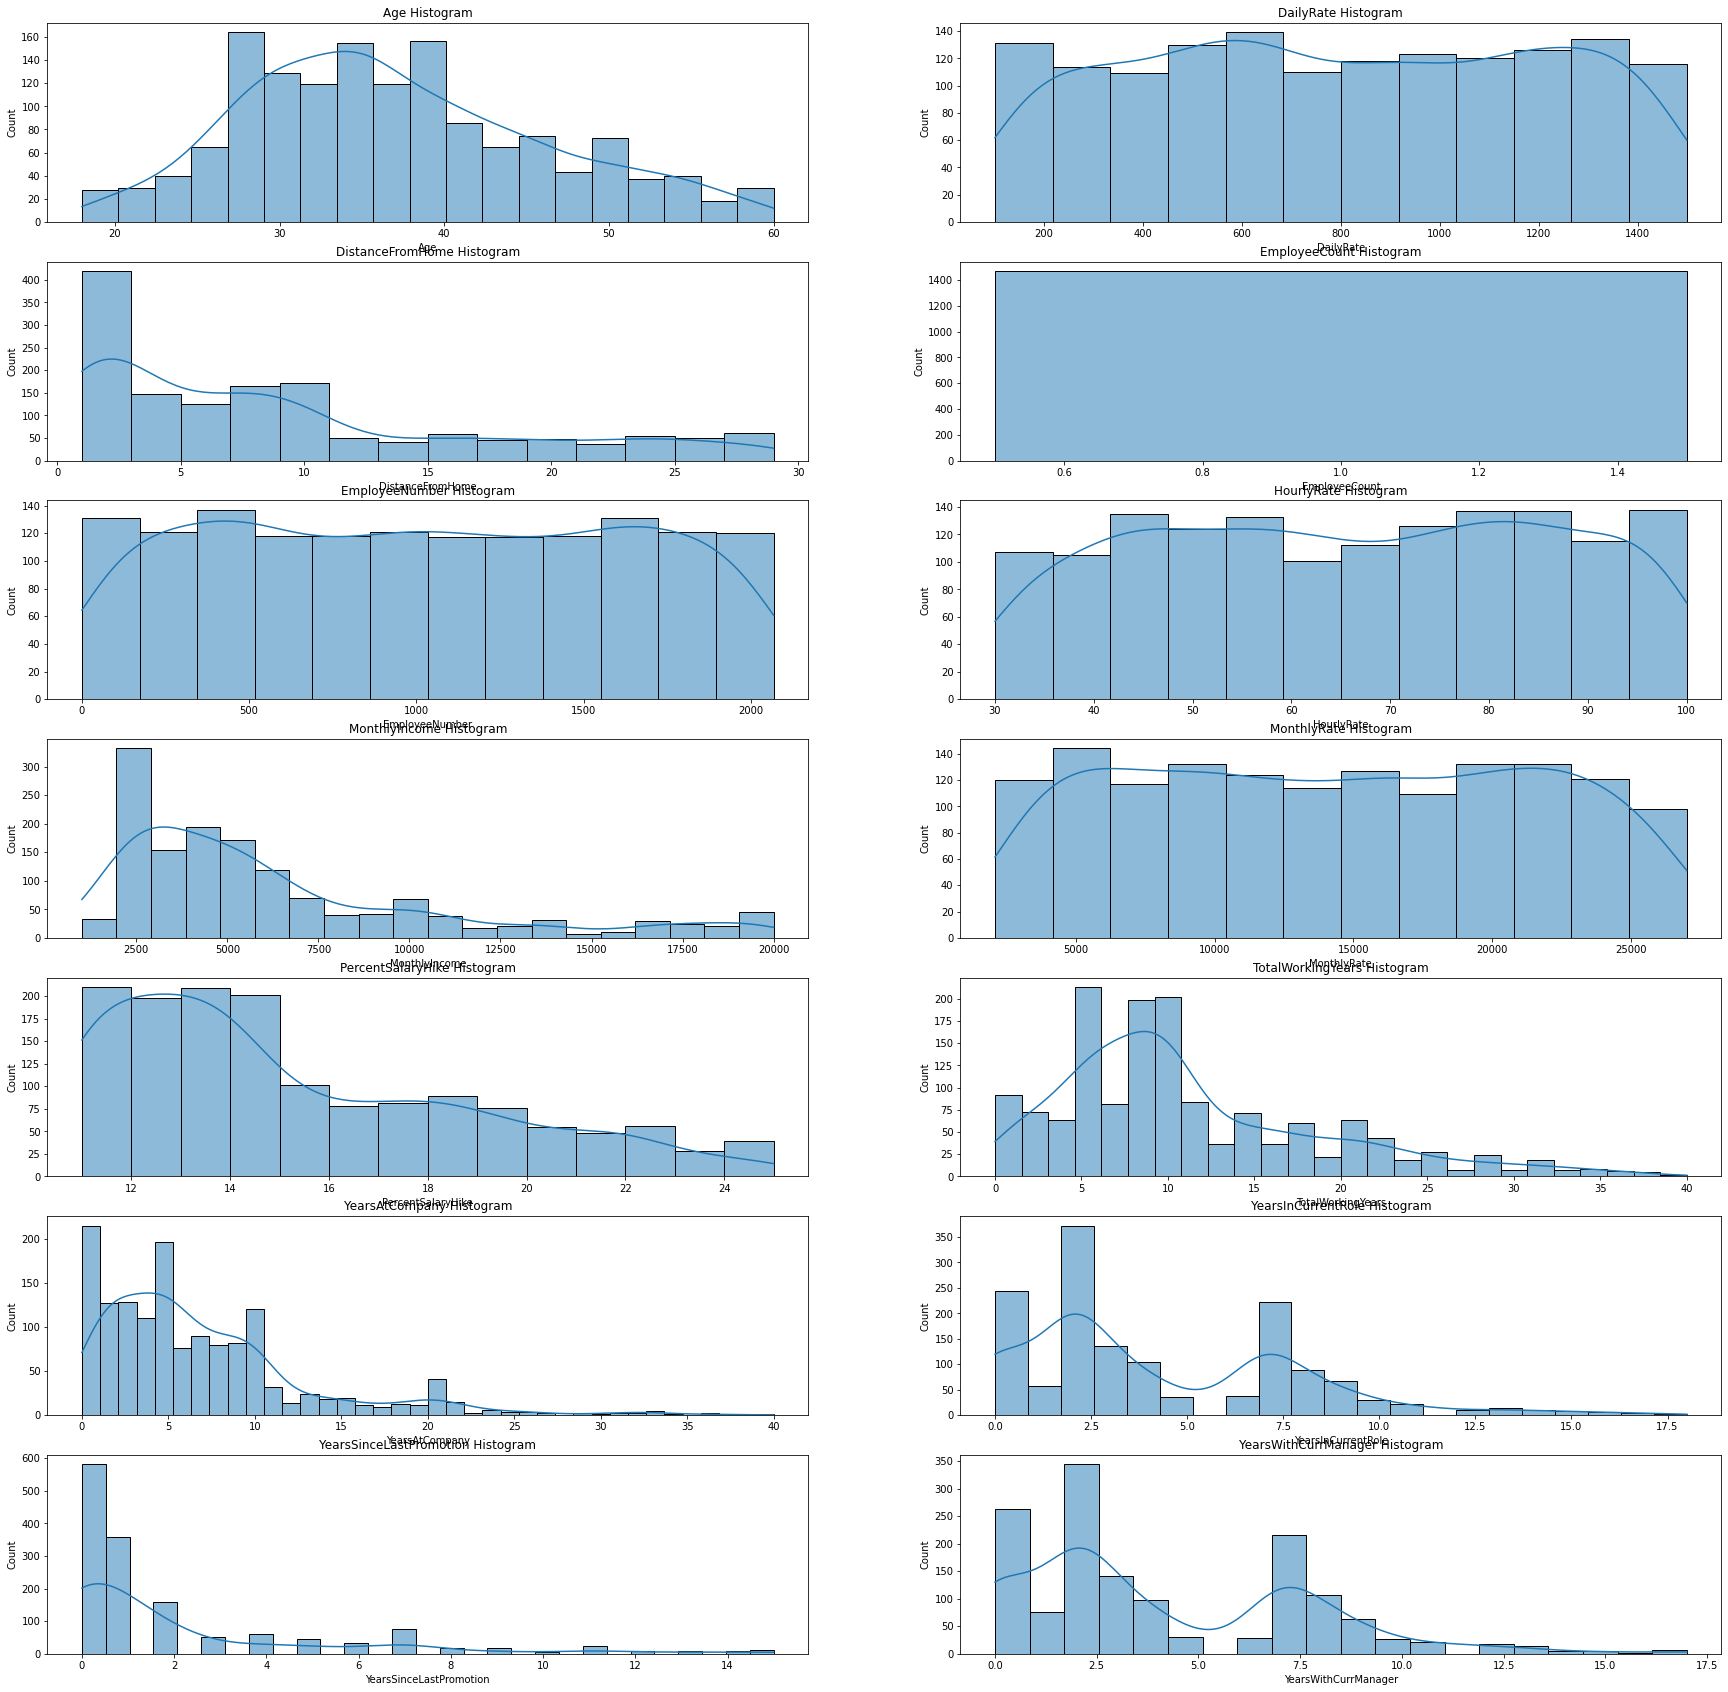

In [20]:
plt.figure(figsize = (30,30))
for i,feature in enumerate(num_features):
    ax = plt.subplot(7,2,i+1)
    sns.histplot(df[feature],kde = True)
    ax.set_title(feature + " Histogram")

###Outliers

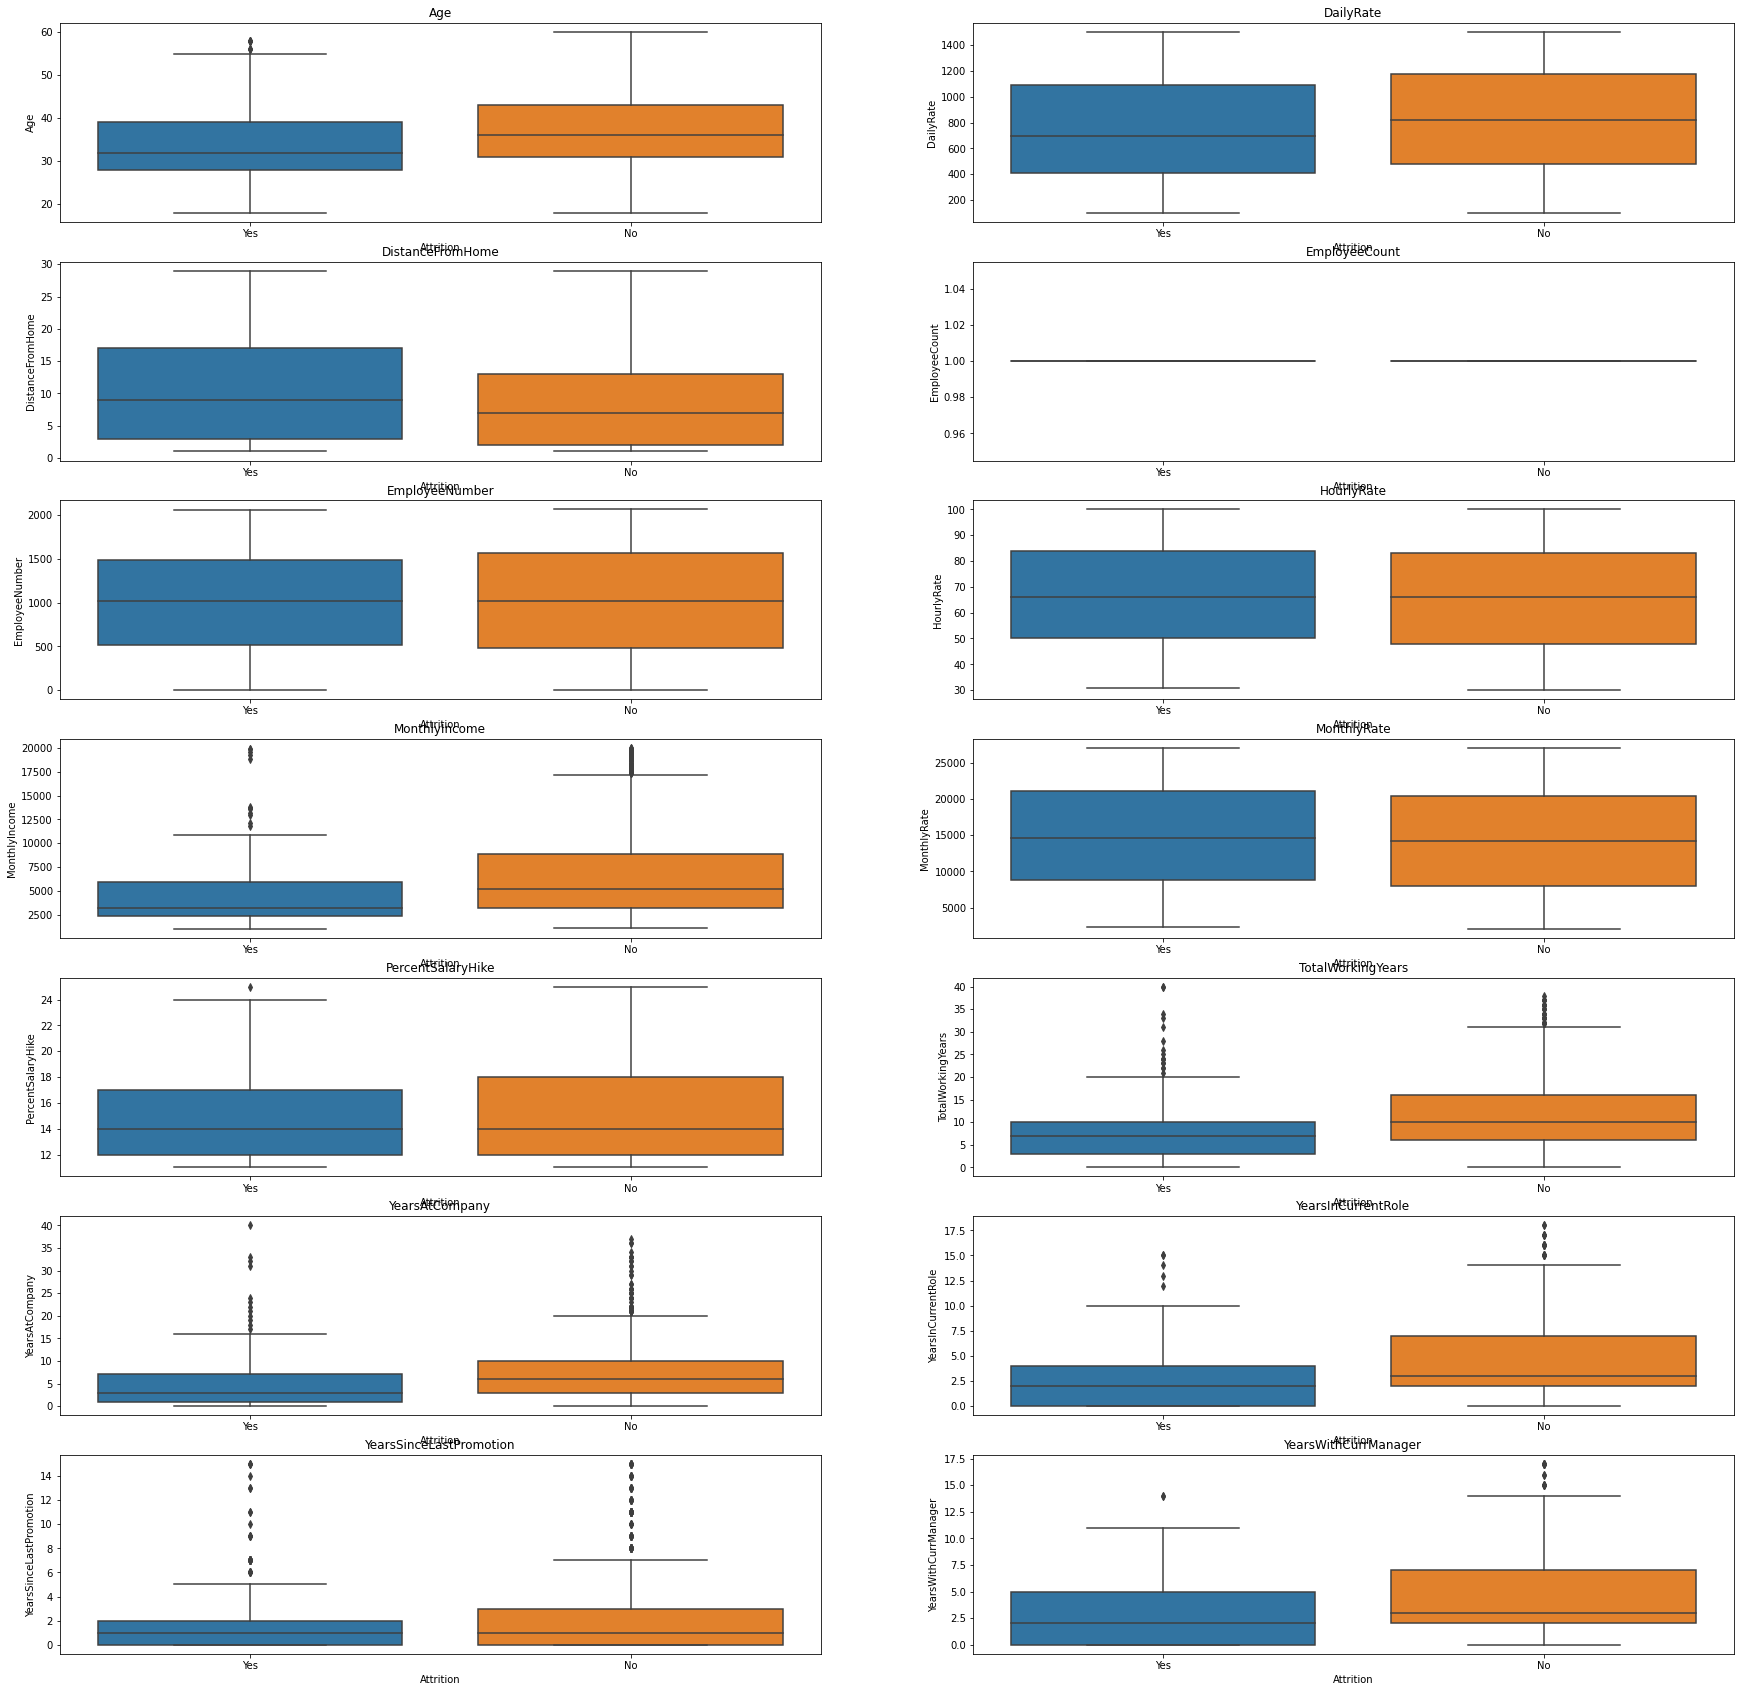

In [21]:
plt.figure(figsize = (30,30))
for i,feature in enumerate(num_features):
    ax = plt.subplot(7,2,i+1)
    sns.boxplot(y = df[feature], x = df['Attrition'])
    ax.set_title(feature)

###Analysis of categorical features

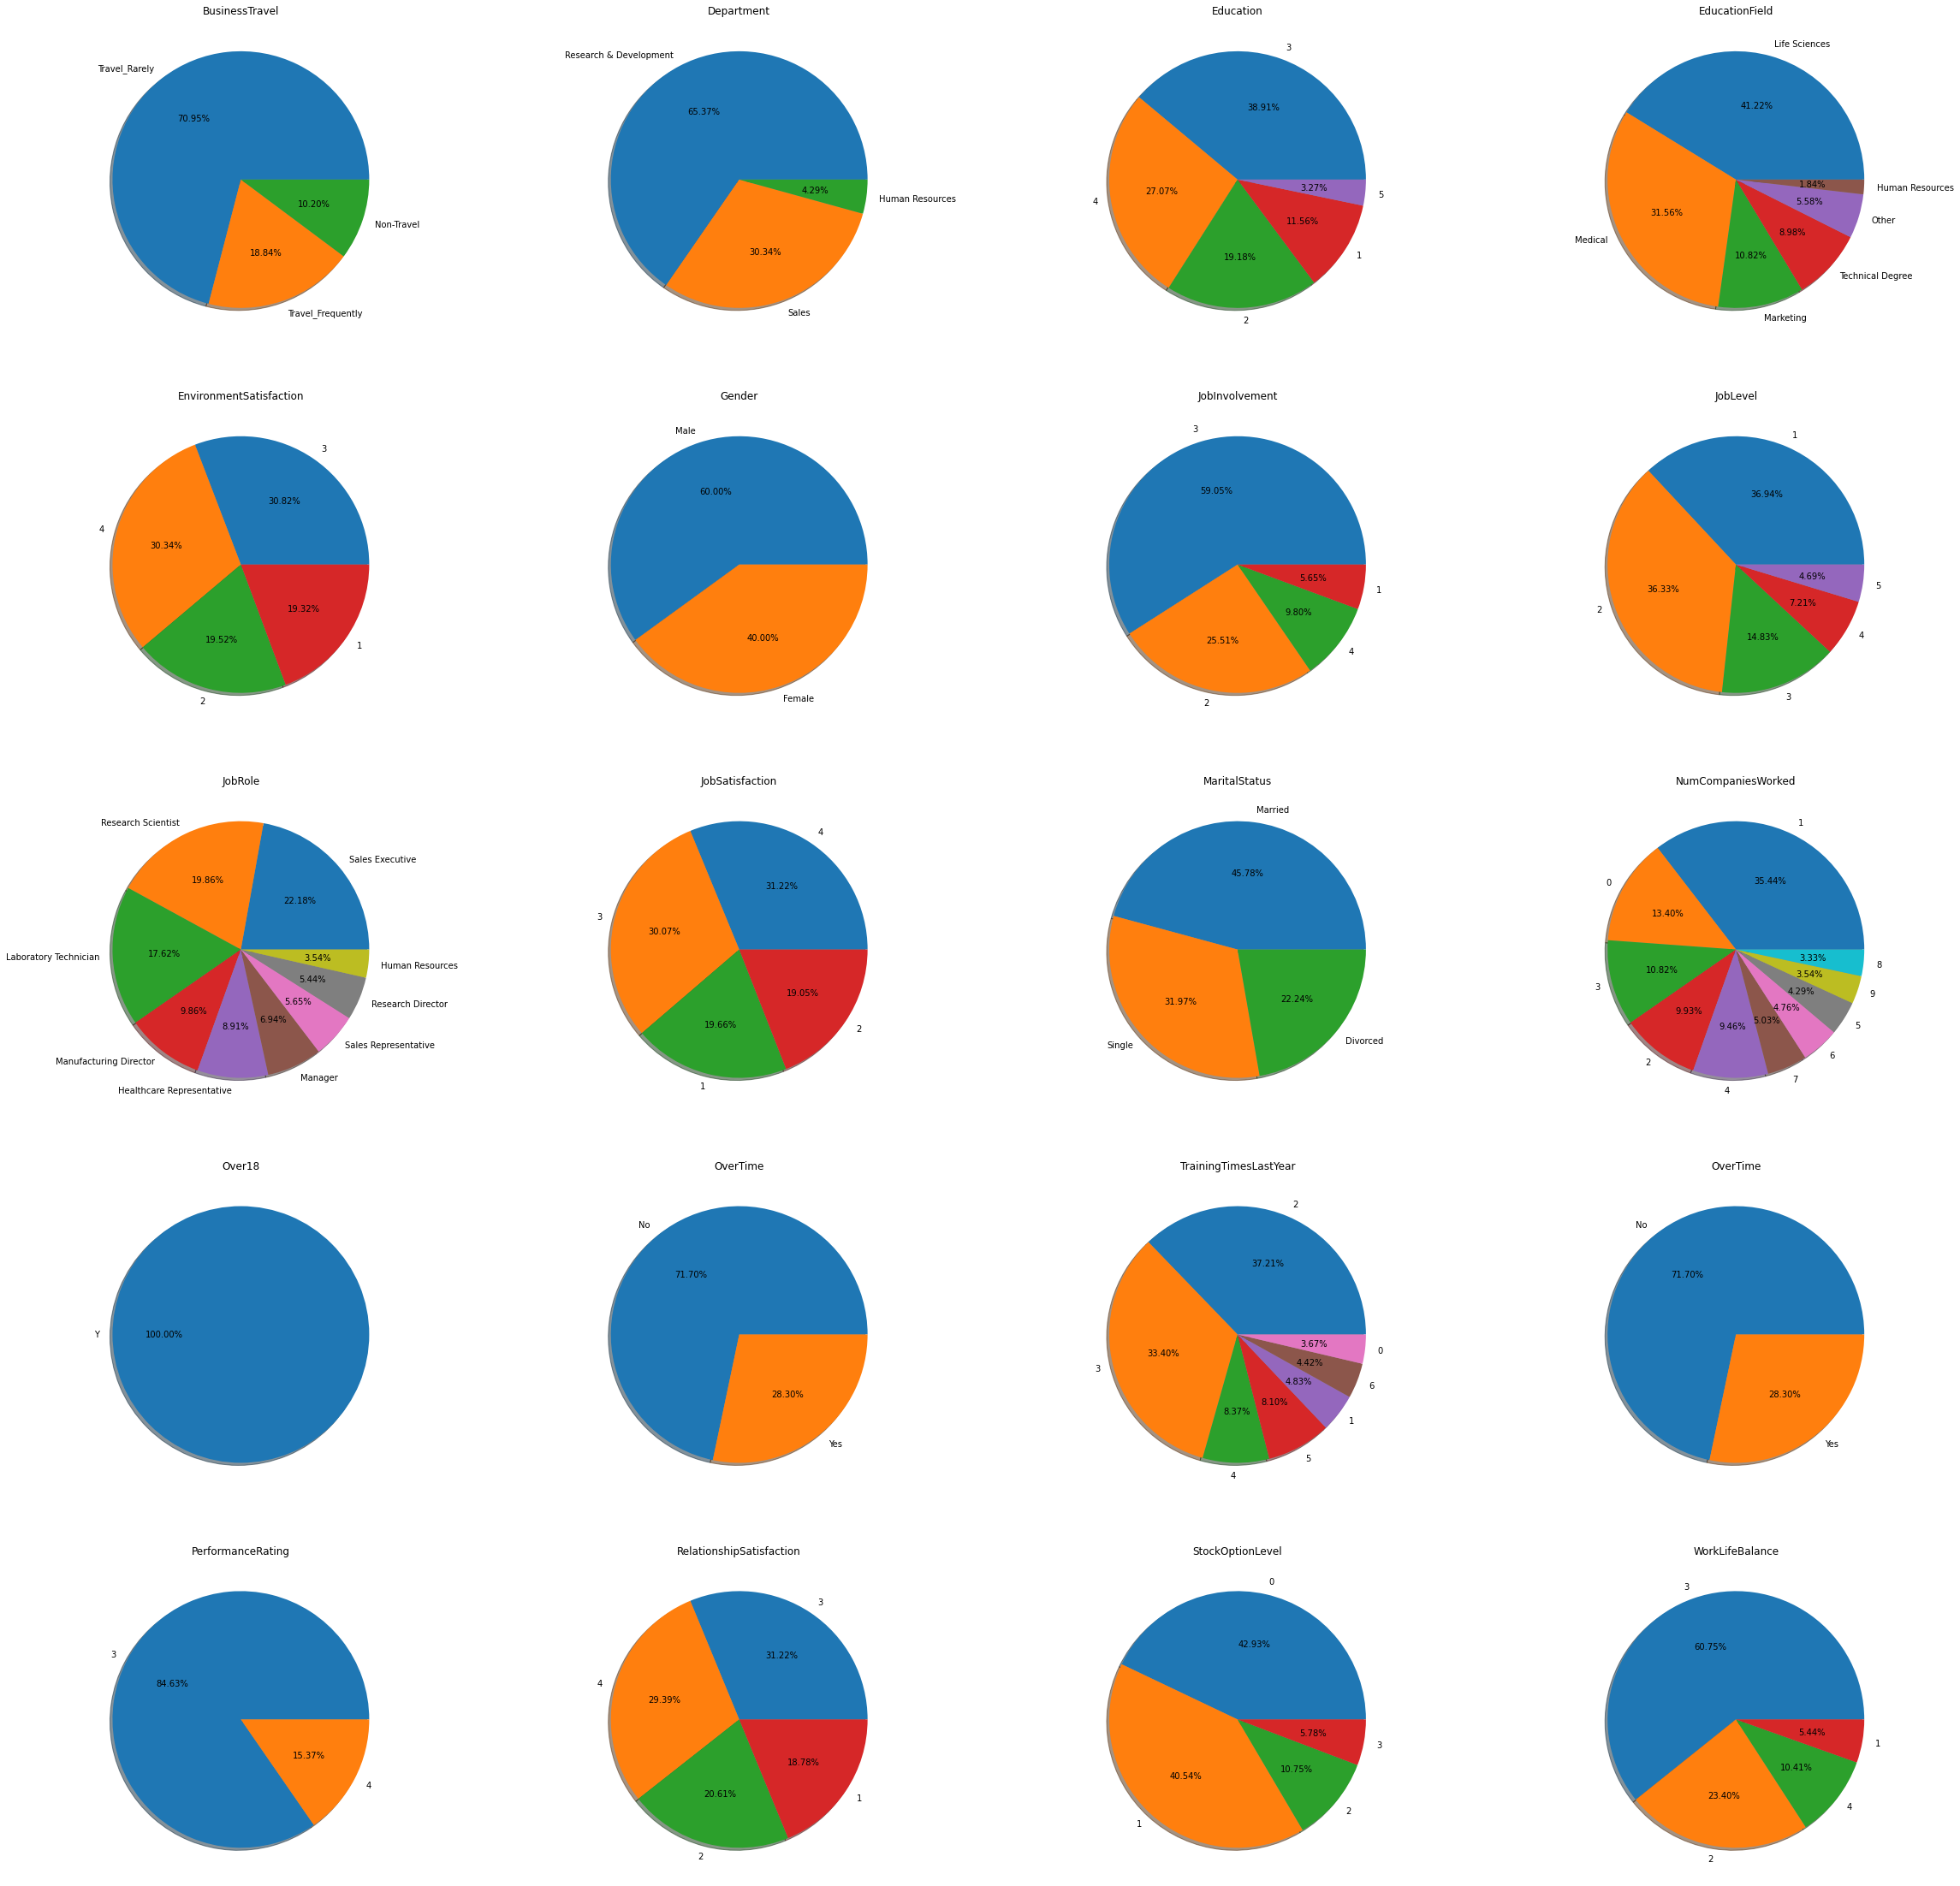

In [22]:
plt.figure(figsize = (40,40))
for i,feature in enumerate(categorical_features):
    labels = df[feature].value_counts().index
    size = df[feature].value_counts().values
    ax = plt.subplot(5,4,i+1)
    ax.pie(size,labels = labels,shadow = True,autopct = "%.2f%%")
    plt.title(feature)
    ax.axis('off')

###Numerical features vs Attrition

####Age:

*   Attrition rate higher in later 20's


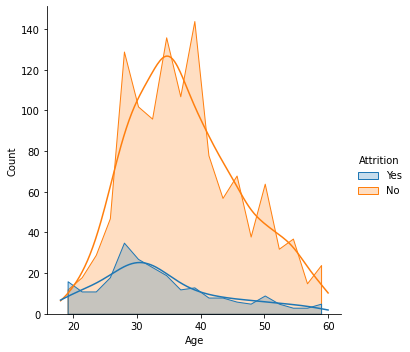

In [23]:
sns.displot(x = "Age", hue = "Attrition",element = "poly", data = df, kde = True)

####Monthly income feature:


*   Attrition rate is most in case of low income



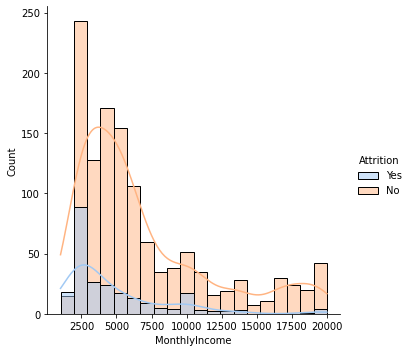

In [24]:
sns.displot(x = "MonthlyIncome", hue = "Attrition", data = df,kde = True,palette = 'pastel')

####Attrition rates by Deapartment


*  In Human Resources, approximately 1 out of every 3 women in HR leave the company. For men, the same case is in the Sales department.



In [25]:
plot_df = df.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
            color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'}) 
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',font_color='#28221D',xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True,tickangle=30,col=2)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.show()

####Job Satisfaction feature: 

*   28% people left the job as they weren't satisfied with their Job



In [26]:
plot_df = df.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('JobSatisfaction')
plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
    {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='JobSatisfaction', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction', bargap=.09,font_color='#28221D',
                  xaxis_title='Job Satisfaction',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

####YearsAtCompany feature:
*   Attrition rate decreases as Year at company increses to 15 years and more



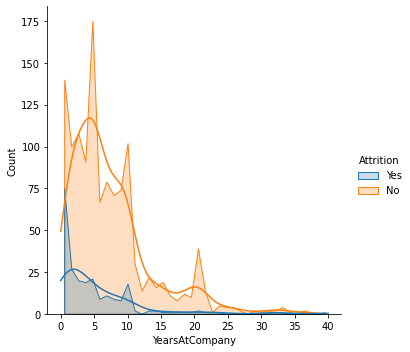

In [27]:
sns.displot(x = "YearsAtCompany",element = "poly", hue = "Attrition", data = df,kde = True)

####Gender feature:

*   Attrition is higher in male employees



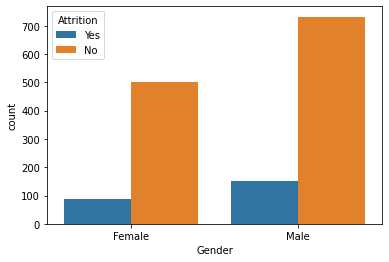

In [28]:
sns.countplot(x = "Gender",hue = "Attrition",data = df)

####Overtime feature:


*   Attrtion rate is higher in cases where employees do overtime



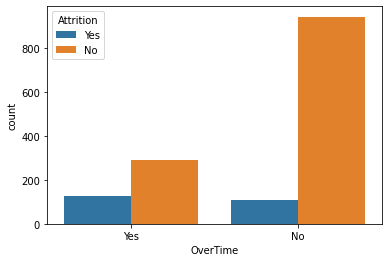

In [29]:
sns.countplot(x = "OverTime",hue = "Attrition",data = df)

####Main features affecting the attrion rate are:


*   Monthly Income
*   Age
*   Percentage Salary Hike
*   Years at Company



##Removing unnecessary columns

In [30]:
data = df.copy()

In [31]:
df.drop(['EmployeeCount','Over18','EmployeeNumber','StandardHours'],axis=1, inplace=True)

##Categorical Encoding

In [32]:
lbcode = LabelEncoder()
print("Encoded data: ")
def encode(dataframe):
  list1 = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus', 'OverTime']
  for i in list1:
    dataframe[i] = lbcode.fit_transform(dataframe[i])
  return dataframe

data_encoded = encode(df)
data_encoded

Encoded data: 


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


##Plotting correlation

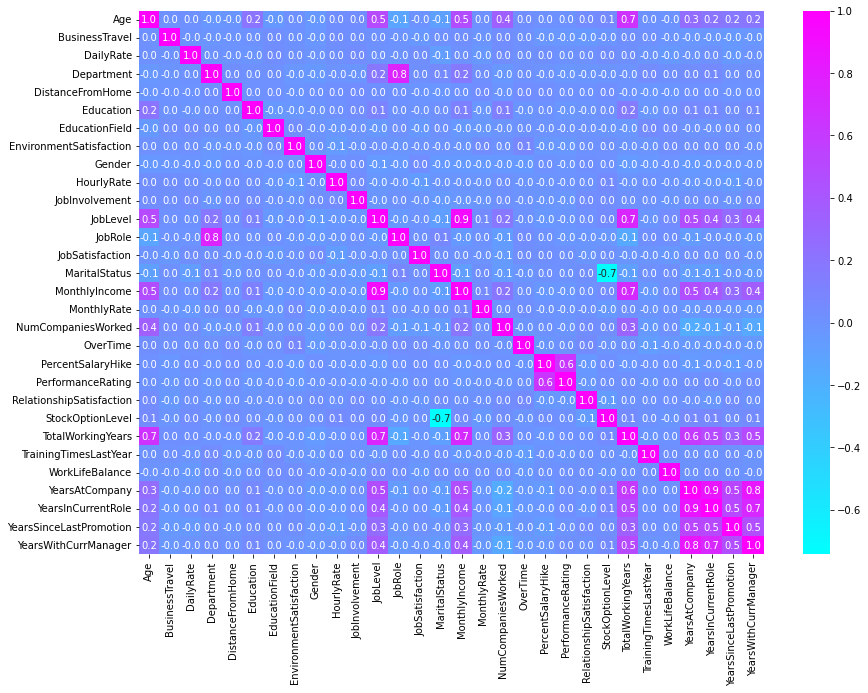

In [33]:
cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
figure = plt.figure(figsize=(14,10))
sns.heatmap(df[cols].corr(method = 'spearman'),
                annot=True, 
                fmt = ".1f", 
                cmap = "cool")
plt.show()

##Removing strongly correlated columns

*   'YearsInCurrentRole' strongly correlated to 'YearsAtCompany'
*   'JobLevel' strongly correlated to 'MonthlyIncome'
*   'JobLevel' strongly correlated to 'TotalWorkingYears'
*   'MonthlyIncome' strongly correlated to 'TotalWorkingYears'
*   'YearsAtCompany' strongly correlated to 'YearsWithCurrManager'
*   'YearsAtCompany' strongly correlated to 'YearsInCurrRole'
*   'YearsInCurrRole' strongly correlated to 'YearsWithCurrManager'




In [34]:
df.drop(['TotalWorkingYears','YearsInCurrentRole','JobLevel', 'YearsWithCurrManager'],axis=1, inplace=True)

##Scaling the numerical features

In [35]:
num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'YearsAtCompany', 'YearsSinceLastPromotion']
sc = StandardScaler()
for feature in num_features:
    df[feature] = sc.fit_transform(np.array(df[feature]).reshape(-1,1))

In [36]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,1,2,0.742527,2,-1.010909,2,1,2,0,...,8,1,-1.150554,3,1,0,0,1,-0.164613,-0.679146
1,1.322365,0,1,-1.297775,1,-0.147150,1,1,3,1,...,1,0,2.129306,4,4,1,3,3,0.488508,-0.368715
2,0.008343,1,2,1.414363,1,-0.887515,2,4,4,1,...,6,1,-0.057267,3,2,0,3,3,-1.144294,-0.679146
3,-0.429664,0,1,1.461466,1,-0.764121,4,1,4,0,...,1,1,-1.150554,3,3,0,3,3,0.161947,0.252146
4,-1.086676,0,2,-0.524295,1,-0.887515,1,3,1,1,...,9,0,-0.877232,3,4,1,3,3,-0.817734,-0.058285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0,1,0.202082,1,1.703764,2,3,3,1,...,4,0,0.489376,3,3,1,3,3,-0.327893,-0.679146
1466,0.227347,0,2,-0.469754,1,-0.393938,1,3,4,1,...,4,0,-0.057267,3,1,1,5,3,-0.001333,-0.368715
1467,-1.086676,0,2,-1.605183,1,-0.640727,3,1,2,1,...,1,1,1.309341,4,2,1,0,3,-0.164613,-0.679146
1468,1.322365,0,1,0.546677,2,-0.887515,3,3,4,1,...,2,0,-0.330589,3,4,0,3,2,0.325228,-0.679146


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   int64  
 12  JobRole                   1470 non-null   int64  
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

##Removing data imbalance

Before Resampling

In [38]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

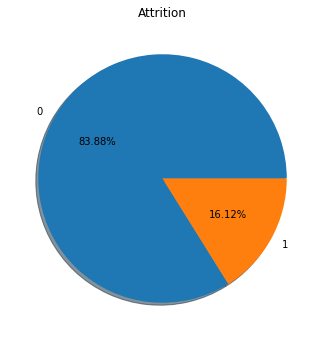

In [39]:
plt.figure(figsize = (40,40))
labels = df['Attrition'].value_counts().index
size = df['Attrition'].value_counts().values
ax = plt.subplot(6,3,1)
ax.pie(size, labels = labels,shadow = True,autopct = "%.2f%%")
plt.title('Attrition')
ax.axis('off')

After Resampling

In [40]:
cols = list(df.columns)
data_sampled,target = SMOTE().fit_resample(df[cols],df["Attrition"])

In [41]:
data_sampled['Attrition'].value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

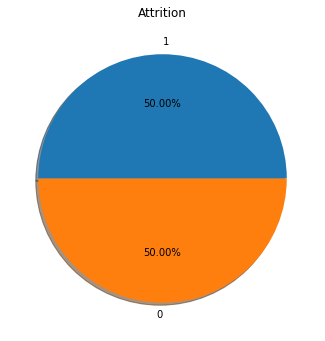

In [42]:
plt.figure(figsize = (40,40))
labels = data_sampled['Attrition'].value_counts().index
size = data_sampled['Attrition'].value_counts().values
ax = plt.subplot(6,3,1)
ax.pie(size, labels = labels,shadow = True,autopct = "%.2f%%")
plt.title('Attrition')
ax.axis('off')

##Splitting data into test and train

In [43]:
X = data_sampled.drop('Attrition', axis=1)
y = data_sampled['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022, stratify = y, shuffle = True)

print("Train Feature Size : ",len(X_train))
print("Train Label Size : ",len(y_train))
print("Test Feature Size : ",len(X_test))
print("Test Label Size : ",len(y_test))

Train Feature Size :  1726
Train Label Size :  1726
Test Feature Size :  740
Test Label Size :  740


##Comparison of Models

*   LogisticRegression
*   KNeighborsClassifier
*   RandomForestClassifier
*   LinearDiscriminantAnalysis
*   SVC
*   DecisionTreeClassifier
*   AdaBoostClassifier
*   LGBMClassifier
*   NaiveBayesClassifier


###On train data

In [44]:
models = [LogisticRegression(), KNeighborsClassifier(), LinearDiscriminantAnalysis(), svm.SVC(kernel = 'linear'), DecisionTreeClassifier(criterion = 'entropy',max_depth = 3), AdaBoostClassifier(n_estimators=1000), RandomForestClassifier(n_estimators = 1000), LGBMClassifier(), GaussianNB()]
accuracy=[]
mean_acc = []
for i in models:
    print(i,":")
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = 5, scoring = "accuracy")
    mean_acc.append(cv_result.mean())
    accuracy.append(cv_result)
    y_pred = cross_val_predict(model,X_train,y_train,cv=5)
    print(classification_report(y_train,y_pred))
    print()

LogisticRegression() :
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       863
           1       0.84      0.83      0.83       863

    accuracy                           0.83      1726
   macro avg       0.83      0.83      0.83      1726
weighted avg       0.83      0.83      0.83      1726


KNeighborsClassifier() :
              precision    recall  f1-score   support

           0       0.97      0.69      0.81       863
           1       0.76      0.98      0.85       863

    accuracy                           0.83      1726
   macro avg       0.86      0.83      0.83      1726
weighted avg       0.86      0.83      0.83      1726


LinearDiscriminantAnalysis() :
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       863
           1       0.83      0.83      0.83       863

    accuracy                           0.83      1726
   macro avg       0.83      0.83      0.83    

In [45]:
classifiers=['Logistic Regression','KNeighborsClassifier', 'Random Forest Classifier', 'LDA', 'Linear SVM', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'LGBMClassifier', 'Naive Bayes']
models_acc_df = pd.DataFrame(accuracy,index = [classifiers])
cols = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
models_acc_df.columns = cols
models_acc_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Logistic Regression,0.841040,0.831884,0.820290,0.857971,0.811594
KNeighborsClassifier,0.820809,0.826087,0.826087,0.846377,0.852174
Random Forest Classifier,0.838150,0.834783,0.811594,0.855072,0.817391
LDA,0.843931,0.837681,0.820290,0.852174,0.826087
Linear SVM,0.719653,0.701449,0.724638,0.710145,0.718841
DecisionTreeClassifier,0.907514,0.881159,0.892754,0.889855,0.881159
AdaBoostClassifier,0.904624,0.915942,0.910145,0.895652,0.924638
LGBMClassifier,0.895954,0.933333,0.915942,0.918841,0.913043
Naive Bayes,0.768786,0.730435,0.776812,0.785507,0.750725


###On test data

In [46]:
for i in models:
    print(i,":")
    model = i
    final_model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    print()

LogisticRegression() :
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       370
           1       0.79      0.82      0.80       370

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80       740
weighted avg       0.80      0.80      0.80       740


KNeighborsClassifier() :
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       370
           1       0.74      0.99      0.85       370

    accuracy                           0.82       740
   macro avg       0.86      0.82      0.82       740
weighted avg       0.86      0.82      0.82       740


LinearDiscriminantAnalysis() :
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       370
           1       0.79      0.81      0.80       370

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80    

##Final model: LGBM Classifier


*   From the Classification reports on train and test data, the evaluation paramters have best values in case of LGBM Classifier.


*   Key point to note is that the Recall parameter is an essential parameter for jusdging the model(Having high accuracy is not enough). This feature also has high value in our case.





###Tuning Parameters 

In [47]:
#Feature optimization
tuned_parameters = {
    'num_leaves ': [25,30,35,40,45],
    'n_estimators': [80, 100, 200, 300, 400, 500, 600, 700, 800],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5]
}


model_final = GridSearchCV(LGBMClassifier(), tuned_parameters, scoring="f1_macro",cv=5)
model_final.fit(X_train, y_train)

print(model_final.best_params_)

{'learning_rate': 0.3, 'n_estimators': 700, 'num_leaves ': 25}


###Confusion Matrix

Train Accuracy : 1.00 
Test Accuracy : 0.92 


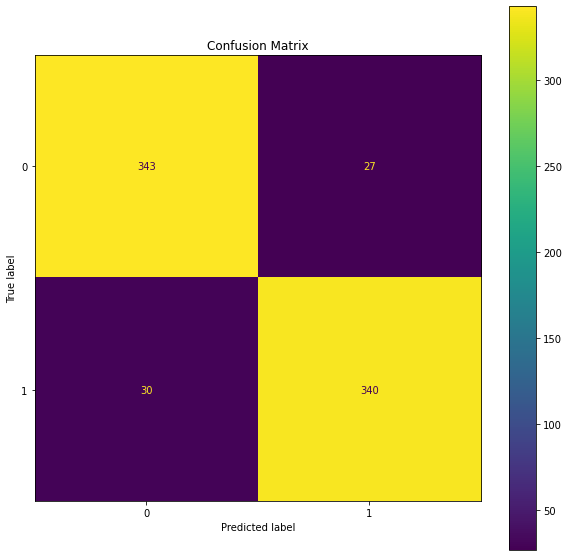

In [51]:
lgbm = LGBMClassifier(n_estimators=700,num_leaves=25,learning_rate=0.3).fit(X_train,y_train)
print("Train Accuracy : {:.2f} ".format(accuracy_score(lgbm.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} ".format(accuracy_score(lgbm.predict(X_test),y_test)))

cm = confusion_matrix(y_test,lgbm.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

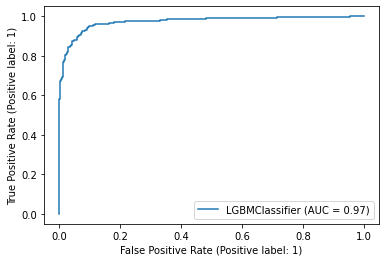

In [50]:
metrics.plot_roc_curve(lgbm, X_test, y_test)
plt.show()